<a href="https://www.kaggle.com/code/kusumakar/fish-species-eda-predictions?scriptVersionId=198200316" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv


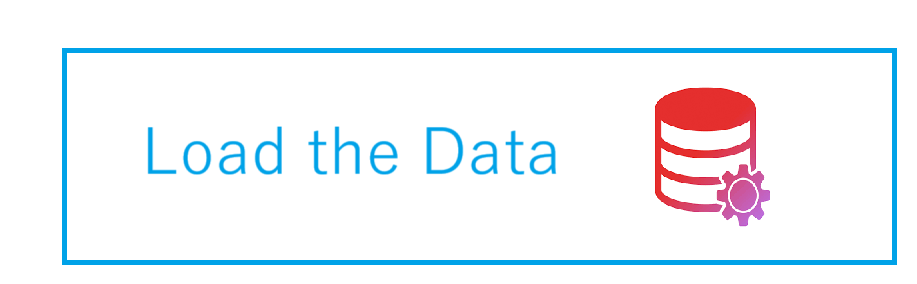

In [2]:
df=pd.read_csv("/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv")

In [3]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


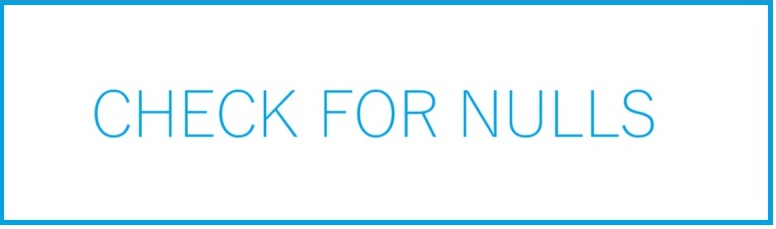

In [4]:
df.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

##  * There are 0 Null Values in the Data Set 

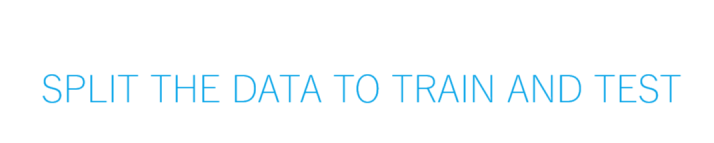

In [5]:
from sklearn.model_selection import train_test_split
df
X = df.drop(columns=["species"])
y=df['species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

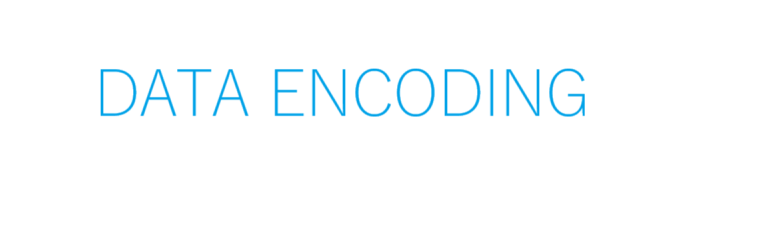

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
numerical_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(include=['object'])
numerical_features = list(numerical_df.columns)
categorical_features = list(categorical_df.columns)

In [8]:
scaler = StandardScaler()
encoder = LabelEncoder()
from sklearn.compose import ColumnTransformer
preprocess = ColumnTransformer(transformers=[
    
    ("StandarScaler",scaler,numerical_features),
   
    
],remainder="passthrough")

In [9]:
X_train = preprocess.fit_transform(X_train)
y_train =encoder.fit_transform(y_train)
X_test = preprocess.transform(X_test)
y_test = encoder.transform(y_test)

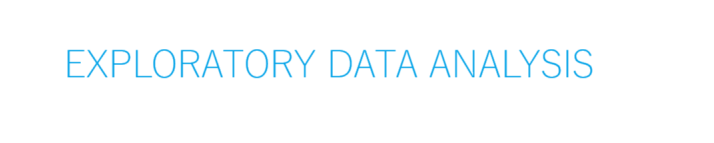

<Axes: >

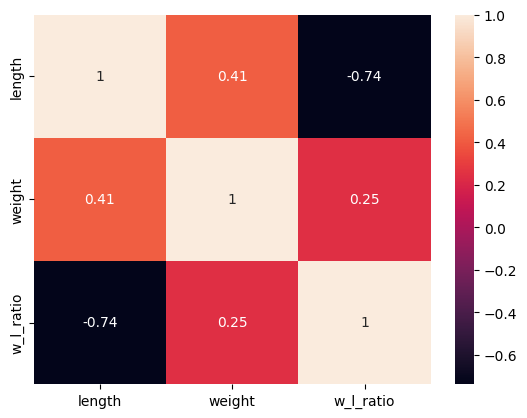

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(X.corr(),annot=True)

<Axes: >

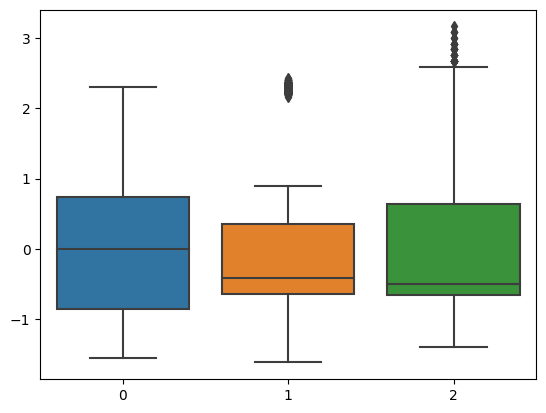

In [11]:
sns.boxplot(X_train)

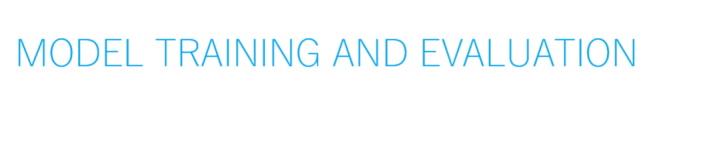

### We will use Extreme Gradient Algorithm and Random Forest Classifer for predictions and check the accuracy. Based on the results, will select the best Model that accurately fits our Data

In [12]:
# Import xgboost library
import xgboost as xgb



In [13]:
# Train the Model
clf = xgb.XGBClassifier()
clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [14]:
#Predict the results on Test Data
y_pred = clf.predict(X_test)

In [15]:
# Check the accuracy of the model
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)


0.9203431372549019

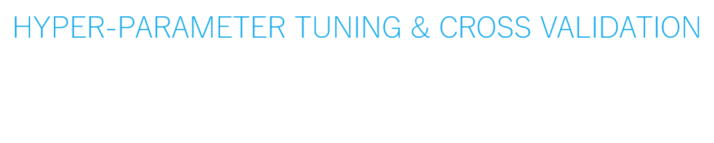

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

# SELECTING THE BEST PARAMETERS

In [17]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}

In [18]:
clf_best = xgb.XGBClassifier(learning_rate= 0.01, max_depth= 7, n_estimators= 50, subsample= 0.8)

## RETRAINING THE MODEL WITH THE BEST PARAMETERS

In [19]:
 clf_best.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [20]:
y_pred = clf_best.predict(X_test)

In [21]:
accuracy_score(y_pred,y_test)

0.9276960784313726

# MODEL ACCURACY WITH XGBOOST - 92.76%

In [22]:
from sklearn.metrics import precision_score,recall_score,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       119
           1       1.00      1.00      1.00        77
           2       0.78      0.65      0.71       109
           3       1.00      0.99      0.99        87
           4       1.00      1.00      1.00        89
           5       1.00      0.99      1.00       103
           6       1.00      1.00      1.00        65
           7       0.62      0.77      0.69        81
           8       1.00      1.00      1.00        86

    accuracy                           0.93       816
   macro avg       0.93      0.93      0.93       816
weighted avg       0.93      0.93      0.93       816



In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy_score(pred,y_test)

0.9301470588235294

## Random Forest with Hyperparameter tuning

In [24]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total t

### Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.94

In [25]:
best_rf = RandomForestClassifier(bootstrap= True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100)

In [26]:
best_rf.fit(X_train,y_train)
pred=best_rf.predict(X_test)

In [27]:
accuracy_score(pred,y_test)

0.9301470588235294

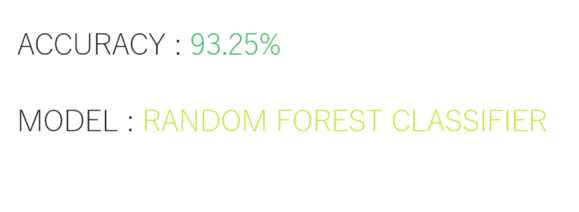